#**Importing Necessary libraries**


In [ ]:
!pip install matplotlib

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

# **Pre-processing**
**Normalizing the data into 0 to 1 and reshaping the size**

In [ ]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

# **Adding noise to the original images**

In [ ]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

# **Visualizing the images**

In [ ]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


# **Preparing the data**

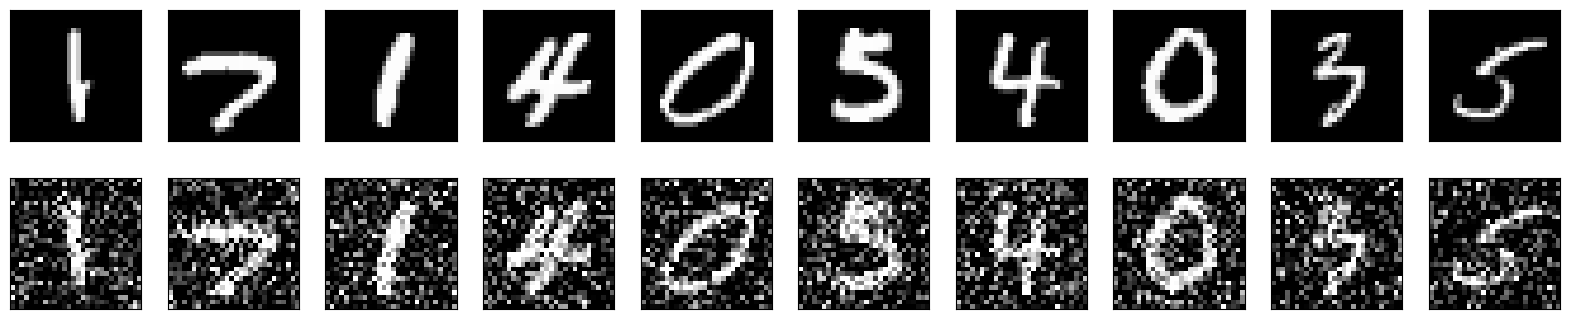

In [ ]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

# **Building the Autoencoder**

In [ ]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)        9248  

2024-07-11 10:14:49.345534: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1926] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 17947 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB MIG 3g.20gb, pci bus id: 0000:b7:00.0, compute capability: 8.0


# **Training the model**

In [ ]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50


2024-07-11 10:14:51.246797: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:467] Loaded cuDNN version 90100
2024-07-11 10:14:52.225470: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb160ae6fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-11 10:14:52.225522: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB MIG 3g.20gb, Compute Capability 8.0
2024-07-11 10:14:52.232071: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1720692892.349650  994793 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 6s 6ms/step - loss: 0.1317 - val_loss: 0.0737
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0723 - val_loss: 0.0701
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0699 - val_loss: 0.0686
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0686 - val_loss: 0.0676
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0677 - val_loss: 0.0669
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0671 - val_loss: 0.0665
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0666 - val_loss: 0.0660
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0662 - val_loss: 0.0656
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0659 - val_loss: 0.0653
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0656 - val_loss: 0.0651
Epoch 11/5

# **Prediction**

313/313 [==============================] - 1s 1ms/step


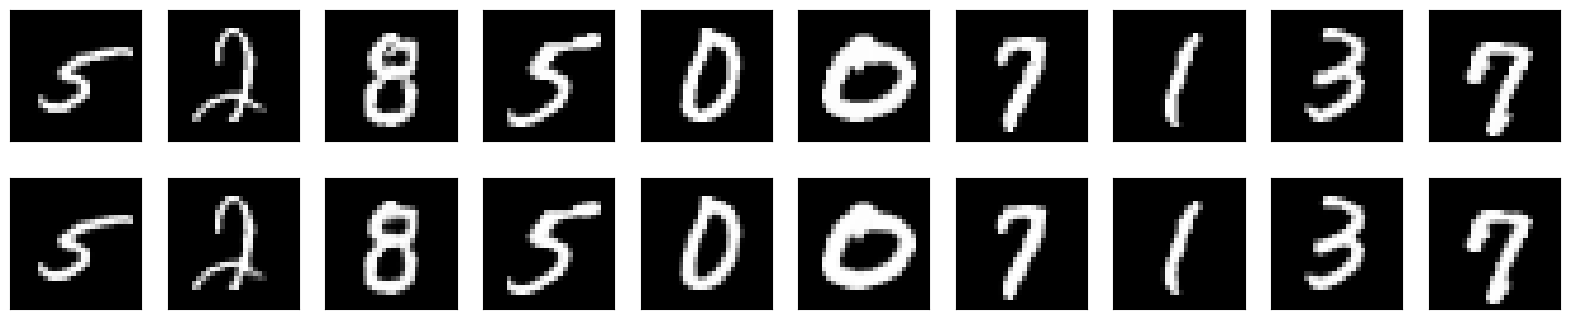

In [ ]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [ ]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1017 - val_loss: 0.0943
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0937 - val_loss: 0.0920
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0920 - val_loss: 0.0908
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0911 - val_loss: 0.0901
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0904 - val_loss: 0.0895
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0899 - val_loss: 0.0892
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0895 - val_loss: 0.0888
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0891 - val_loss: 0.0888
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0888 - val_loss: 0.0882
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0885 - val_lo

313/313 [==============================] - 0s 997us/step


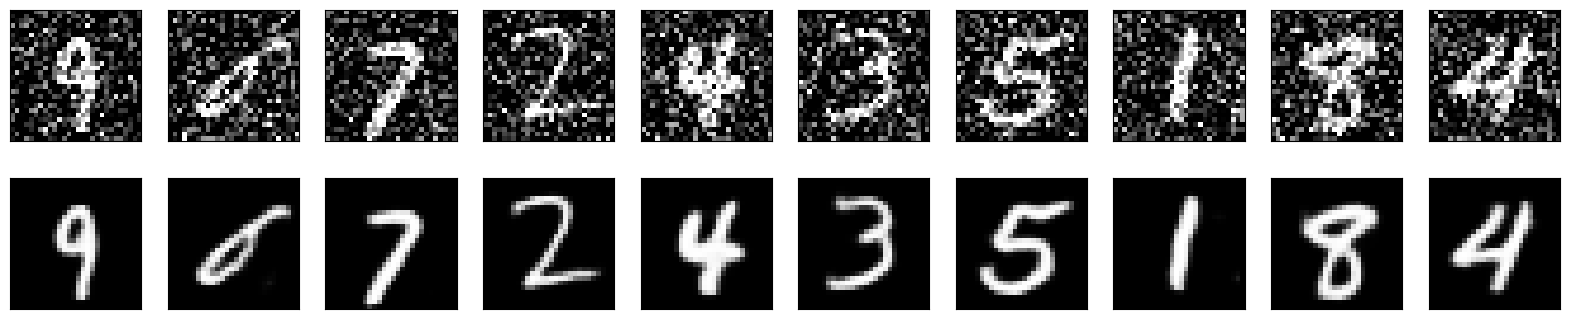

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)